In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('african_econ_crises.csv')

In [3]:
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [4]:
data.shape

(1059, 14)

In [5]:
data.cc3.unique()

array(['DZA', 'AGO', 'CAF', 'CIV', 'EGY', 'KEN', 'MUS', 'MAR', 'NGA',
       'ZAF', 'TUN', 'ZMB', 'ZWE'], dtype=object)

In [6]:
data.country.unique()

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

In [7]:
data.corr()

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


In [8]:
b = data.banking_crisis.copy()

In [9]:
a=[]
for i in b:
    if i=='crisis':
        a.append(1)
    else:
        a.append(0)

In [11]:
a = np.array(a)

In [12]:
a = pd.DataFrame(a,columns=['target_cpy'])

In [13]:
data = pd.concat([data,a],axis =1)

In [14]:
data.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis', 'target_cpy'],
      dtype='object')

In [21]:
# d1 = ['target_cpy','case', 'systemic_crisis', 'exch_usd','domestic_debt_in_default','inflation_annual_cpi',
#       'independence','currency_crises', 'banking_crisis']

# da1 = pd.DataFrame()
# for i in d1:
#     if i in data.columns:
#         da1 = pd.concat([da1,data[i]],axis=1)

In [19]:
# da1.head()

In [20]:
# plt.figure(figsize=(12,6),dpi = 120)
# sns.heatmap(da1.corr(),annot=True,cmap='viridis')
# plt.show()

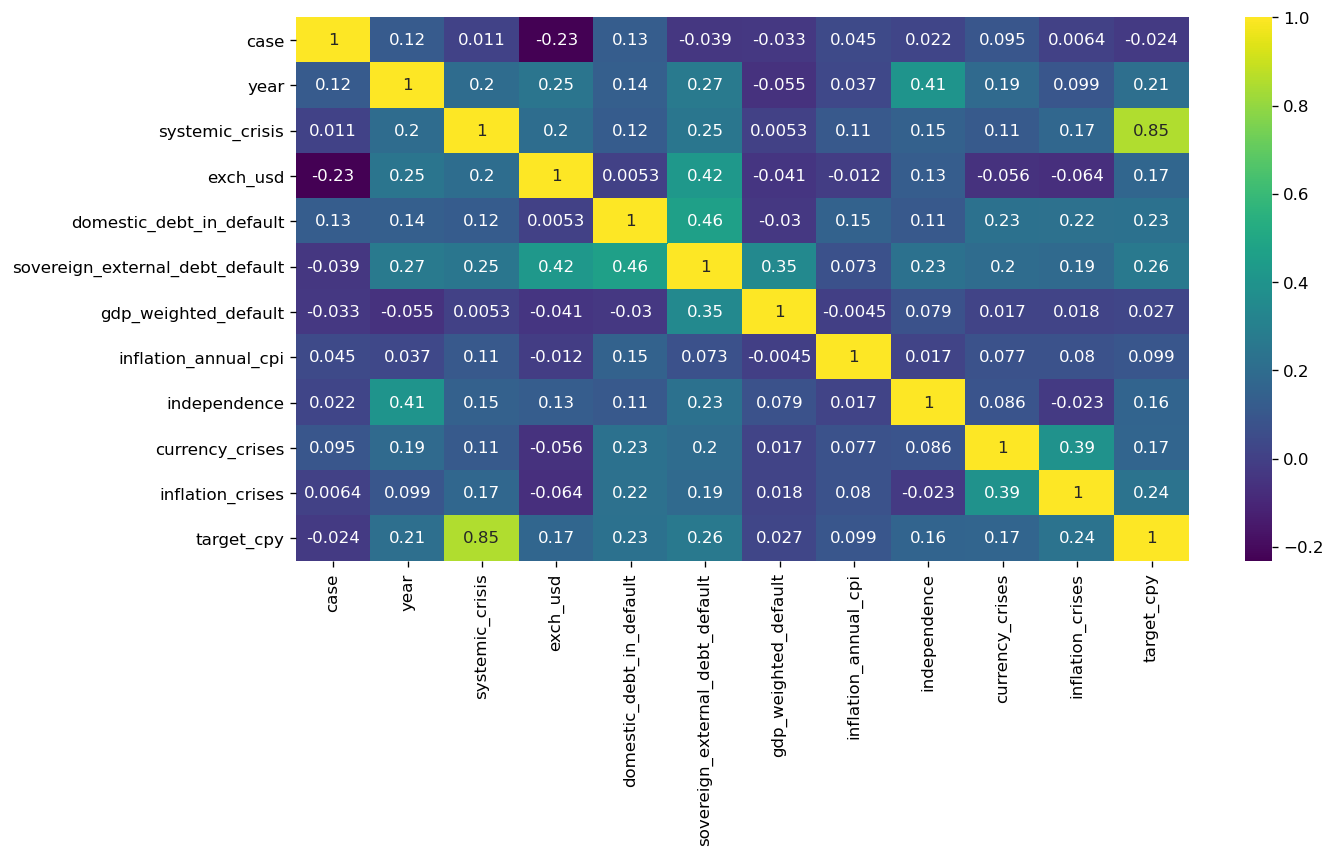

In [18]:
plt.figure(figsize=(12,6),dpi = 120)
sns.heatmap(data.corr(),annot=True,cmap='viridis')
plt.show()